# Baseball Player Statistics

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
import statsmodels as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.metrics import r2_score,mean_squared_error
from sklearn import preprocessing
import sklearn
import yellowbrick
from sklearn.model_selection import train_test_split
import rfpimp
from sklearn.decomposition import PCA
from sklearn.preprocessing import (
    StandardScaler,)
from scipy.cluster import hierarchy
from yellowbrick.features.pca import (
     PCADecomposition,)
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from bokeh.io import output_notebook
from bokeh import models, palettes, transform
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from bokeh.plotting import figure, show
from io import StringIO
from sklearn.tree import export_graphviz
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from matplotlib import pyplot as plt
import sklearn.metrics

In [3]:
desc = pd.read_csv('Description.csv')
desc.head(82)

Unnamed: 0 Variable name   \
0            1          YEAR    
1            2       YRINDEX    
2            3      PLAYERID    
3            4      NAMElast    
4            5     NAMEfirst    
5            6          TEAM    
6            7            LG    
7            8        LGCODE    
8            9             G    
9           10            AB    
10          11             R    
11          12             H    
12          13            HR    
13          14           RBI    
14          15            TB    
15          16            OB    
16          17            PA    
17          18           DBL    
18          19            TR    
19          20            SB    
20          21            CS    
21          22            BB    
22          23            SO    
23          24           IBB    
24          25           HBP    
25          26            SH    
26          27            SF    
27          28          GIDP    
28          29           AVG    
29          30           OBP    
30          31           SLG    
31          32        AVGcum    
32          33        OBPcum    
33          34        SLGcum    
34          35         ABcum    
35          36          Rcum    
36          37          Hcum    
37          38         HRcum    
38          39        RBIcum    
39          40         PAcum    
40          41         OBcum    
41          42         TBcum    
42          43           EXP    
43          44          PAYR    
44          45         MLAVG    
45          46         MLOBP    
46          47         MLSLG    
47          48        MLRAVG    
48          49       MLHRAVG    
49          50      MLRBIAVG    

                                         Description   
0                                   Year (1959-2004)   
1                                Year index (1959=1)   
2                                   Unique player ID   
3                                          Last name   
4                                         First name   
5                        Team(s) played on that year   
6                      League(s) played in that year   
7                    League code (0=AL,1=both, 2=NL)   
8                                              Games   
9                    At bats (number of turns at bat)  
10  Runs (player advances around all 4 bases and s...  
11  Hits (player hits a fair ball and reaches base...  
12  Home runs (balls that fly out of the ballpark ...  
13  Runs batted in (number of runners who score on...  
14                     Total bases (=H+DB+2*TR+3*HR)   
15                               On base (=H+BB+HBP)   
16                  Plate appearances (=H+BB+HBP+SF)   
17  Doubles (long hits that allow the batter to ru...  
18  Triples (very long hits that allow the batter ...  
19  Stolen bases (runner “steals” the next base by...  
20  Caught stealing (runner is tagged out with the...  
21  Bases on balls (player “walks” to first base i...  
22  Struck out (player is out by swinging-and-miss...  
23  Intentional bases on balls (pitcher deliberate...  
24  Hit by pitch (player gets to go to first base ...  
25  Sacrifices (player hits the ball and gets hims...  
26  Sacrifice flies (sacrifices that are balls cau...  
27  Grounded into double play (player hits a ball ...  
28                           Batting average (=H/AB)   
29                       On base percentage (=OB/PA)   
30                      Slugging percentage (=TB/AB)   
31  Cumulative batting average of the same player ...  
32                     Cumulative on-base percentage   
33                    Cumulative slugging percentage   
34                          Cumulative total at-bats   
35                             Cumulative total runs   
36                             Cumulative total hits   
37                        Cumulative total home runs   
38                   Cumulative total runs batted in   
39                Cumulative total plate appearances   
40                 Cumul

In [95]:
df = pd.read_csv('Baseball_player_statistics.csv')

In [37]:
df.head()

YEAR  YRINDEX   PLAYERID NAMElast NAMEfirst TEAM League  League code  \
0  1960        2  aaronha01    Aaron      Hank  ML1     NL            2   
1  1961        3  aaronha01    Aaron      Hank  ML1     NL            2   
2  1962        4  aaronha01    Aaron      Hank  ML1     NL            2   
3  1963        5  aaronha01    Aaron      Hank  ML1     NL            2   
4  1964        6  aaronha01    Aaron      Hank  ML1     NL            2   

   Games  At-bats  ...  OBPcum_Lag1  SLGcum_Lag1  ABcum_Lag1  Rcum_Lag1  \
0    153      590  ...        0.401        0.636         629        116   
1    155      603  ...        0.377        0.602        1219        218   
2    156      592  ...        0.378        0.599        1822        333   
3    161      631  ...        0.381        0.604        2414        460   
4    145      570  ...        0.383        0.600        3045        581   

   Hcum_Lag1  HRcum_Lag1  RBIcum_Lag1  PAcum_Lag1  OBcum_Lag1  TBcum_Lag1  
0        223          39          123         693         278         400  
1        395          79          249        1357         512         734  
2        592         113          369        2027         767        1092  
3        783         158          497        2694        1027        1458  
4        984         202          627        3408        1306        1828  

[5 rows x 82 columns]

# Data Analysis

In [6]:
df.dtypes

YEAR            int64
YRINDEX         int64
PLAYERID       object
NAMElast       object
NAMEfirst      object
                ...  
HRcum_Lag1      int64
RBIcum_Lag1     int64
PAcum_Lag1      int64
OBcum_Lag1      int64
TBcum_Lag1      int64
Length: 82, dtype: object

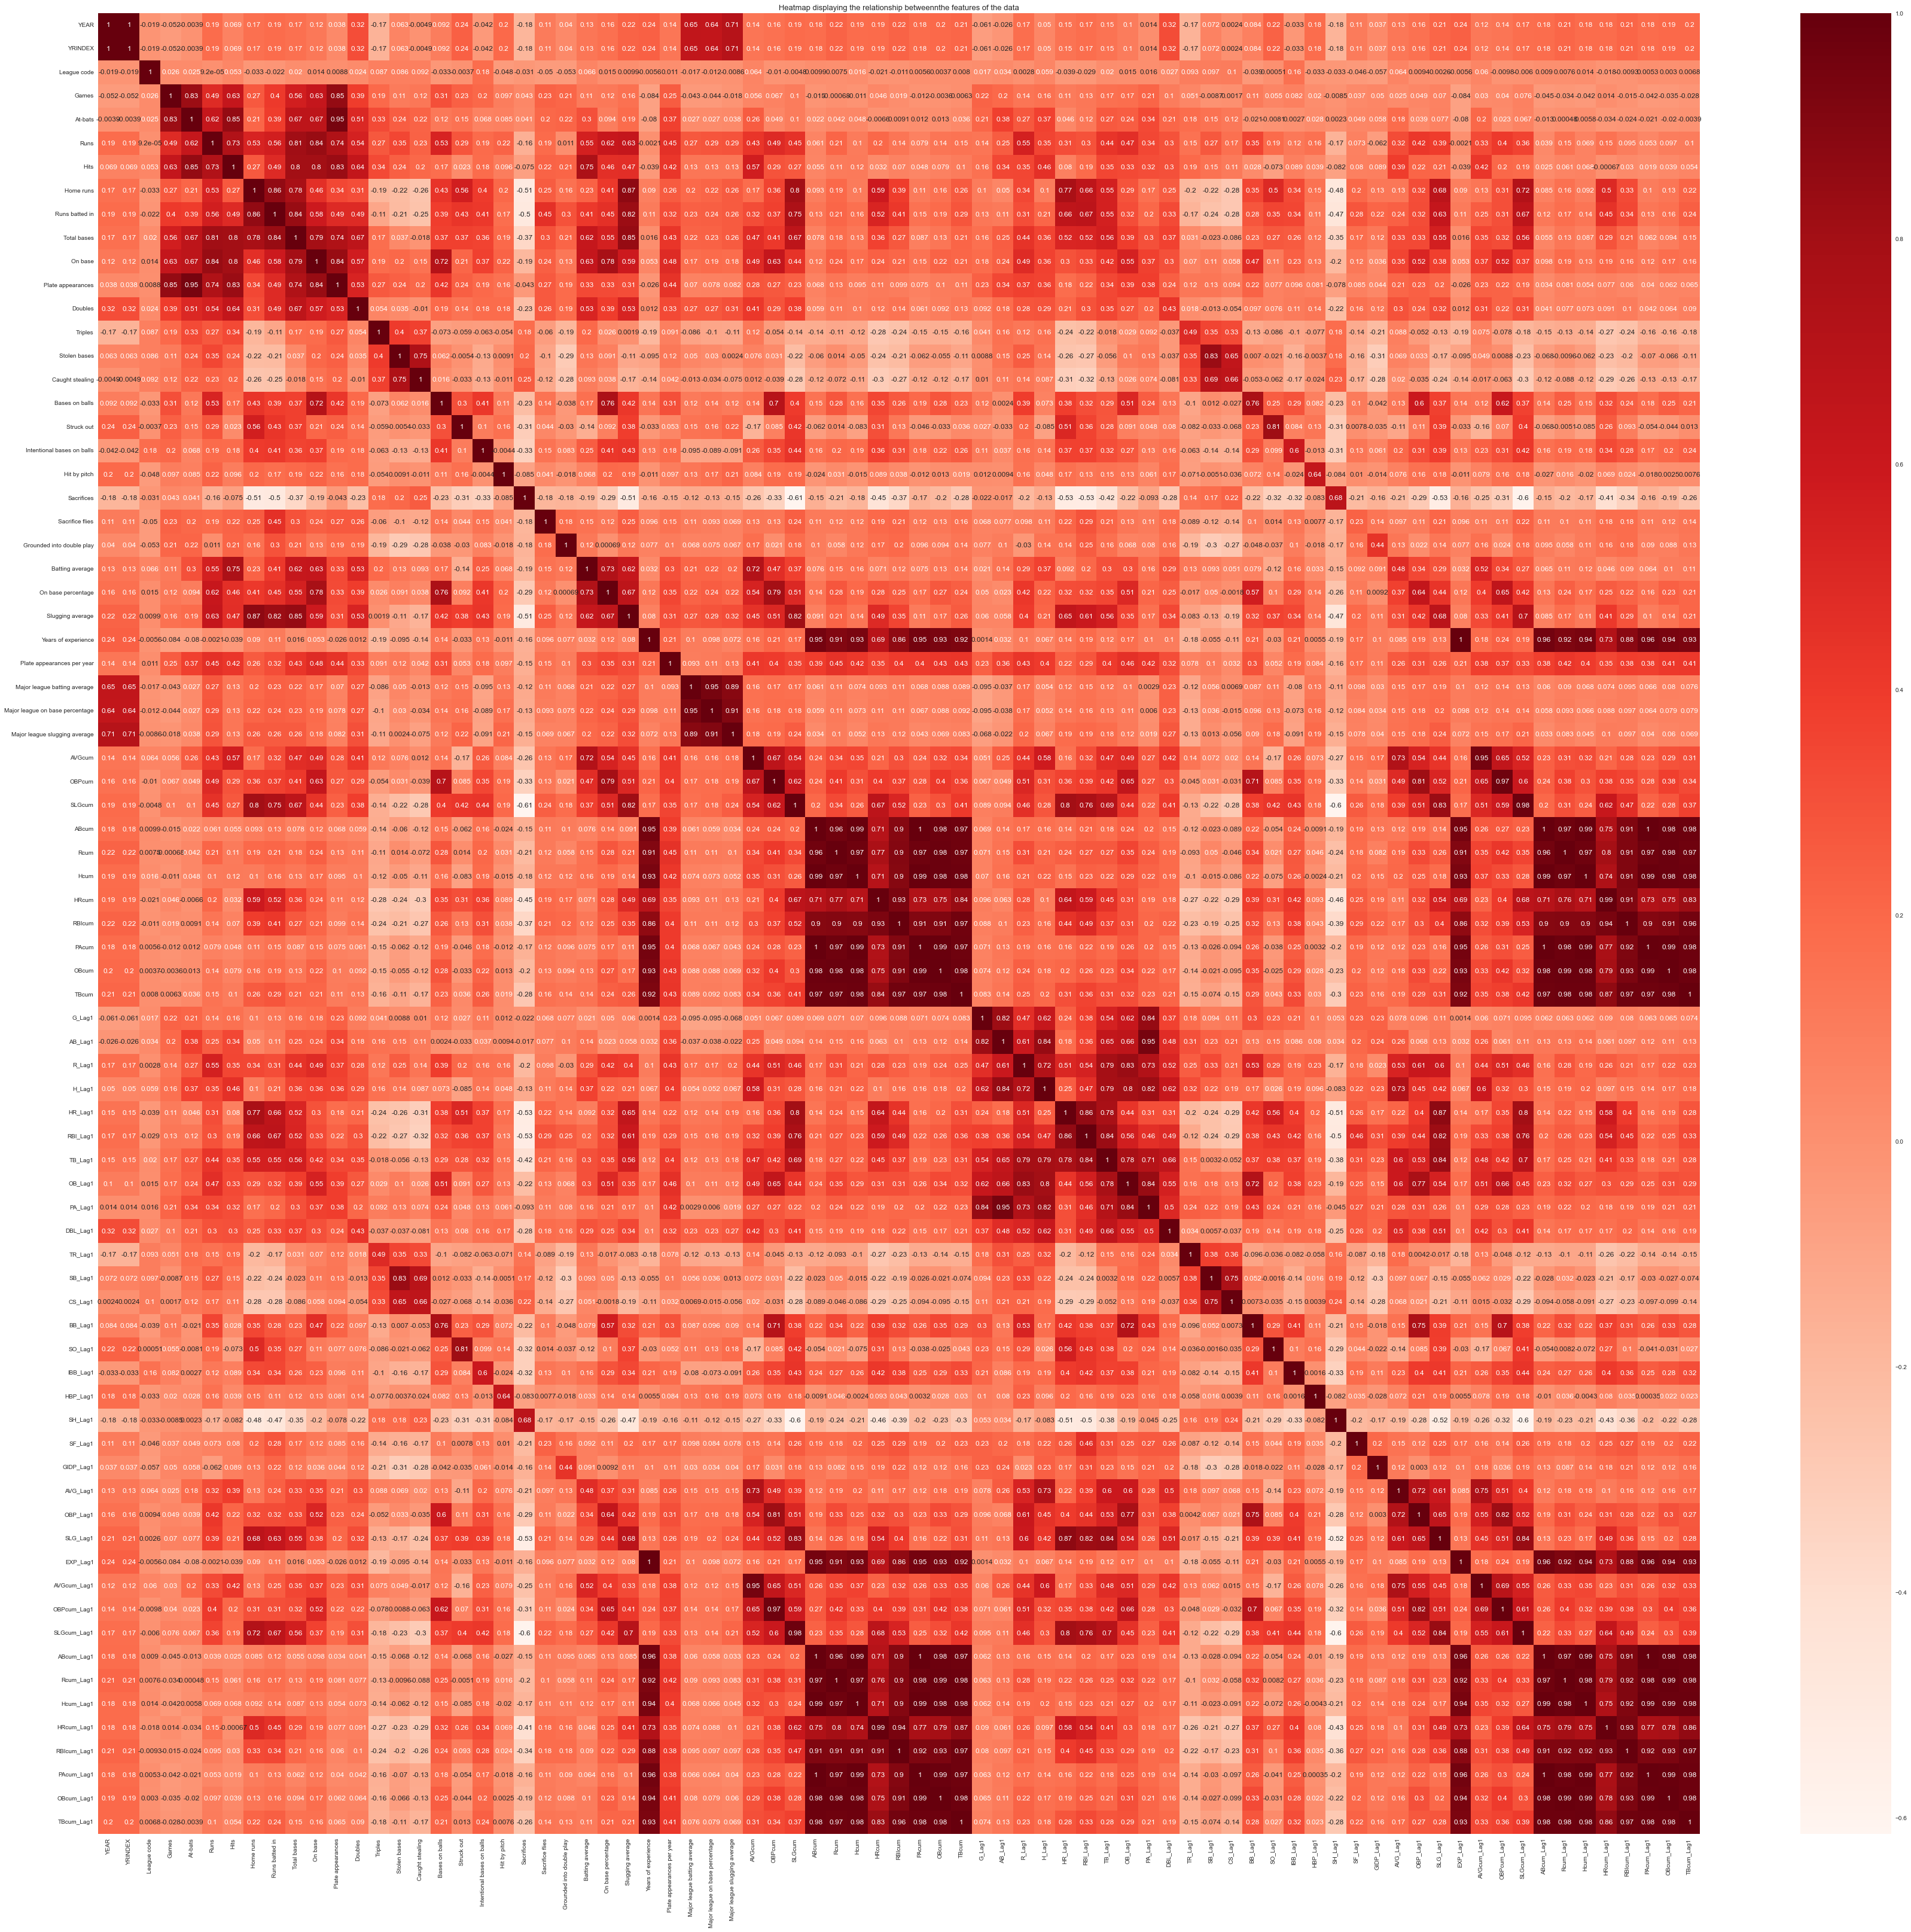

In [7]:
plt.figure(figsize=(60,56))
sns.heatmap(df.corr(),cmap=plt.cm.Reds,annot=True)
plt.title('Heatmap displaying the relationship betweennthe features of the data',
         fontsize=13)
plt.show()

Text(0.5, 1.0, 'Runs with Hits')

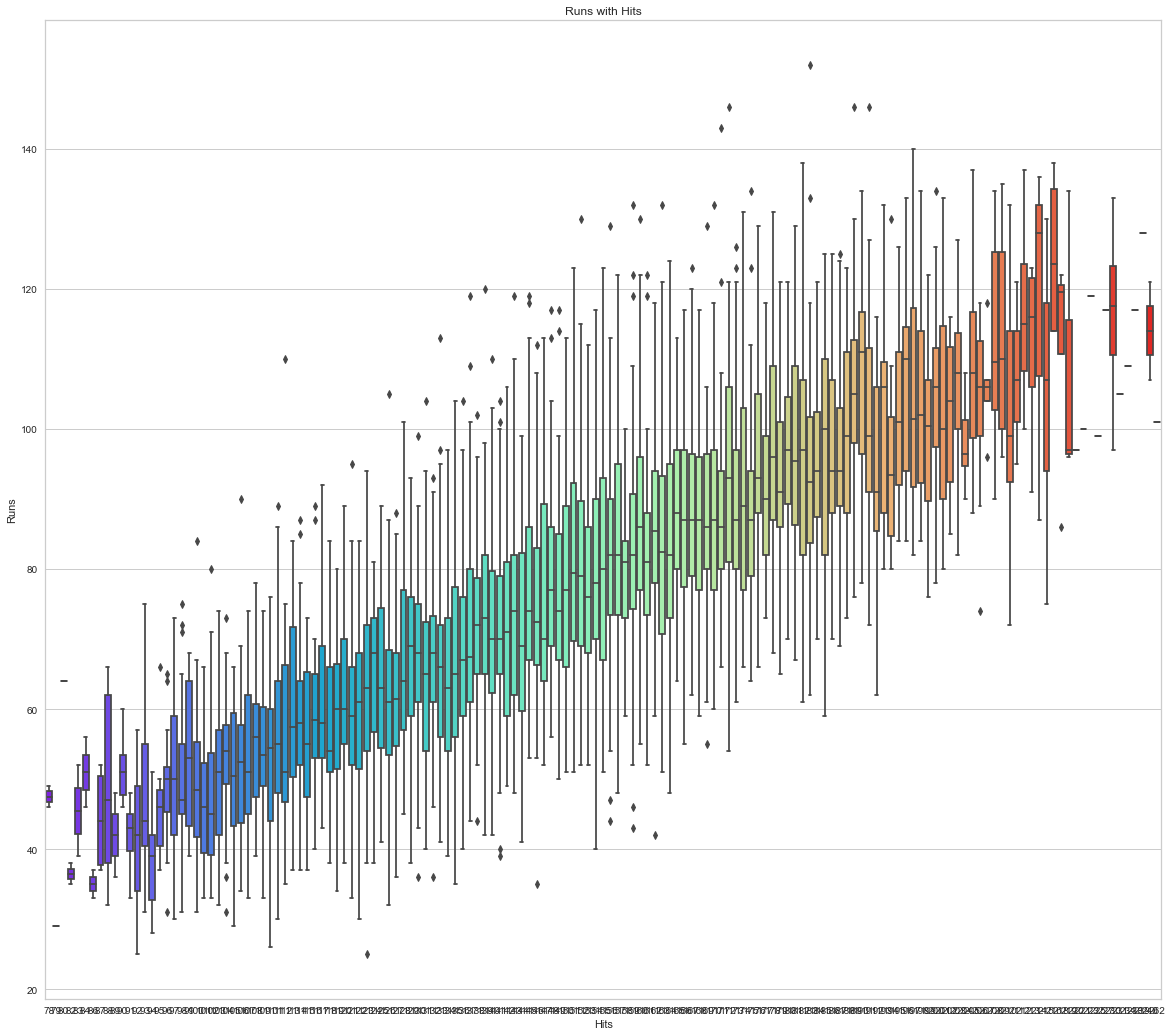

In [8]:
plt.figure(figsize=(20,18))
sns.boxplot(x=df['Hits'],y= df['Runs'],data=df, palette='rainbow')
plt.title("Runs with Hits")

Text(0.5, 1.0, 'Runs with Home runs')

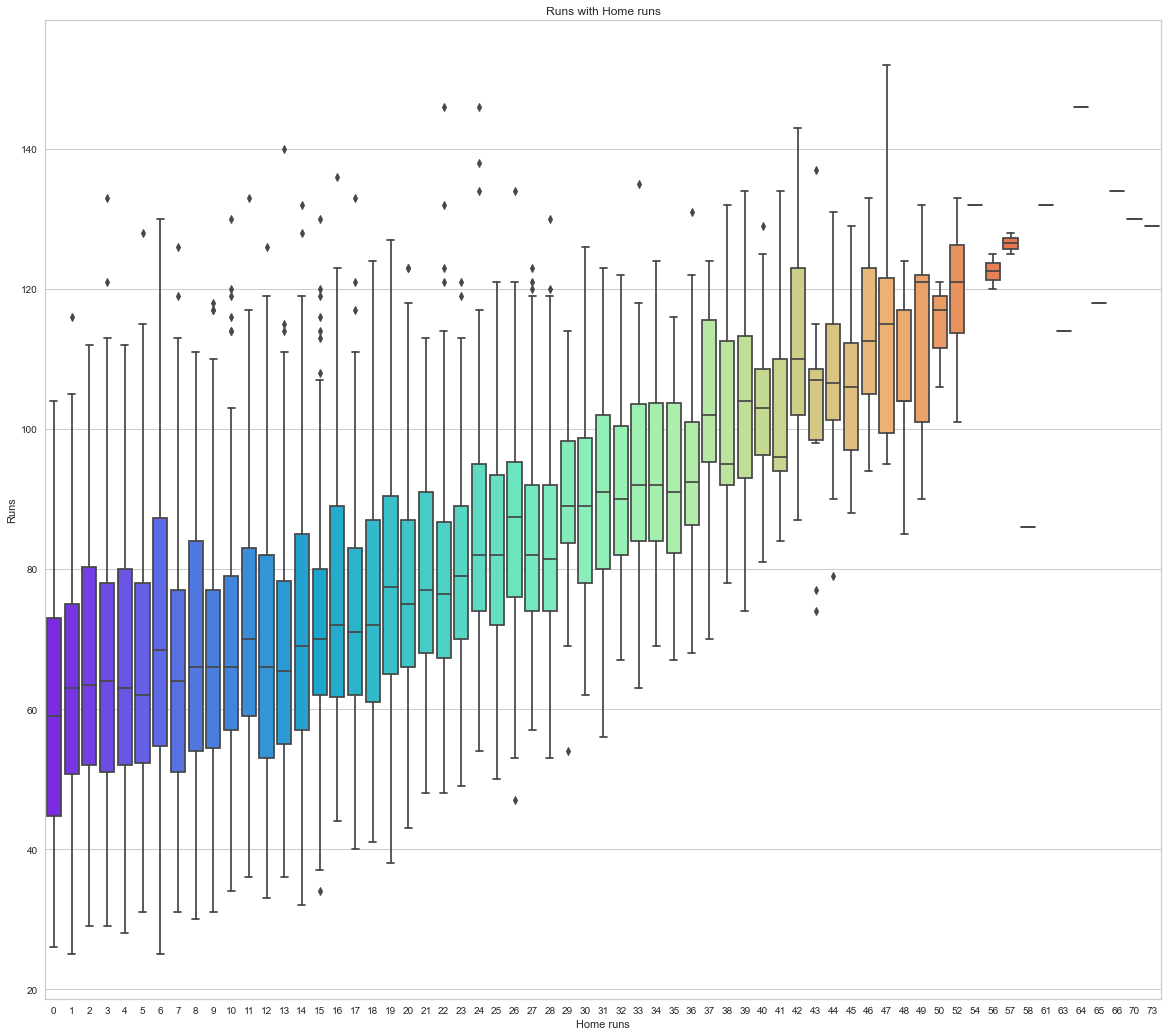

In [9]:
plt.figure(figsize=(20,18))
sns.boxplot(x=df['Home runs'],y= df['Runs'],data=df, palette='rainbow')
plt.title("Runs with Home runs")

Text(0.5, 1.0, 'Violin Plot of plate appearances by on base, Separated by Runs')

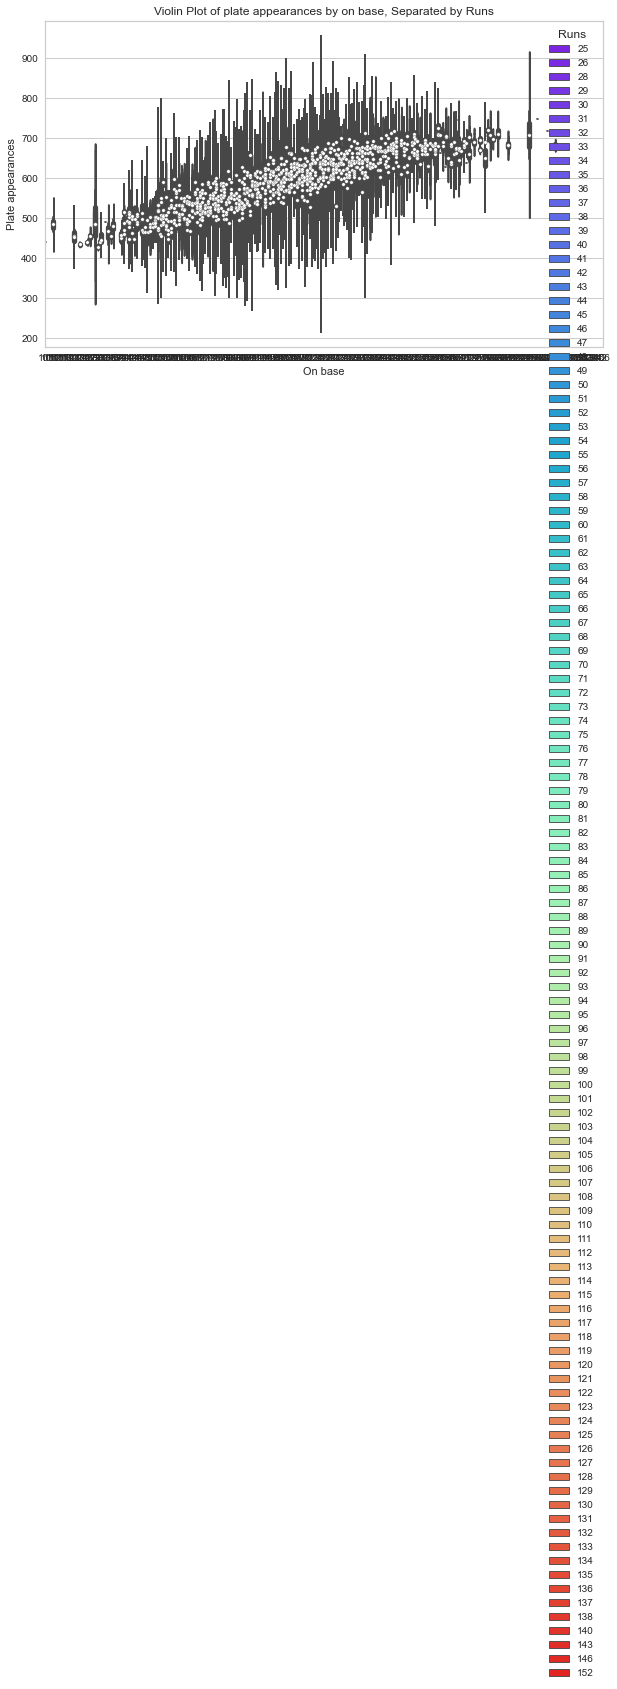

In [10]:
plt.figure(figsize=(10,6))
sns.violinplot(x=df['On base'],y= df["Plate appearances"],data=df, hue=df['Runs'], palette='rainbow')
plt.title("Violin Plot of plate appearances by on base, Separated by Runs")

Text(0.5, 1.0, 'Hits by League , divided by Years of experience')

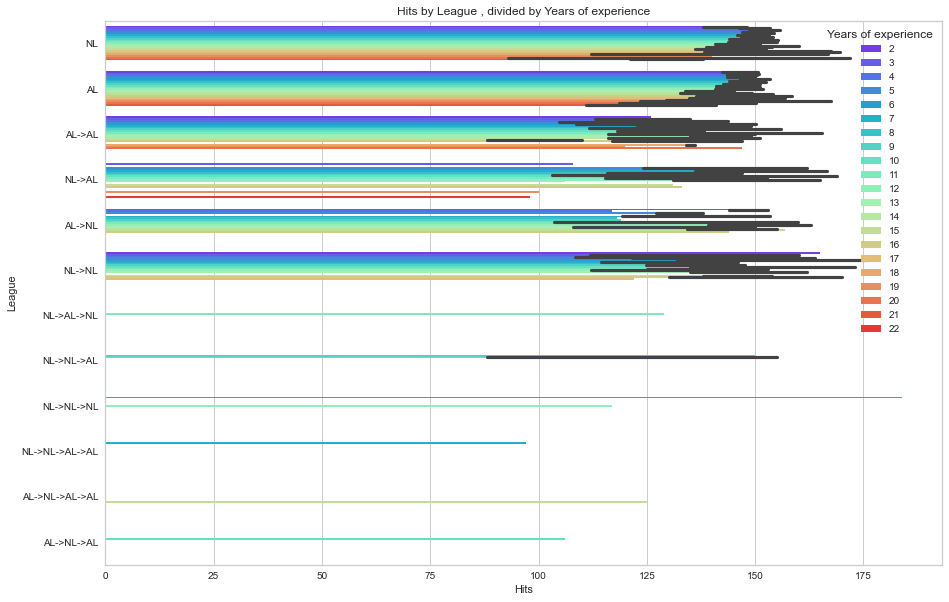

In [11]:
plt.figure(figsize=(15,10))
sns.barplot(x=df['Hits'],y=df['League'],data=df, palette='rainbow', hue='Years of experience')
plt.title("Hits by League , divided by Years of experience")

# Feature Engineering

In [12]:
df.isnull().mean() * 100

YEAR           0.0
YRINDEX        0.0
PLAYERID       0.0
NAMElast       0.0
NAMEfirst      0.0
              ... 
HRcum_Lag1     0.0
RBIcum_Lag1    0.0
PAcum_Lag1     0.0
OBcum_Lag1     0.0
TBcum_Lag1     0.0
Length: 82, dtype: float64

In [44]:
df = df.dropna()

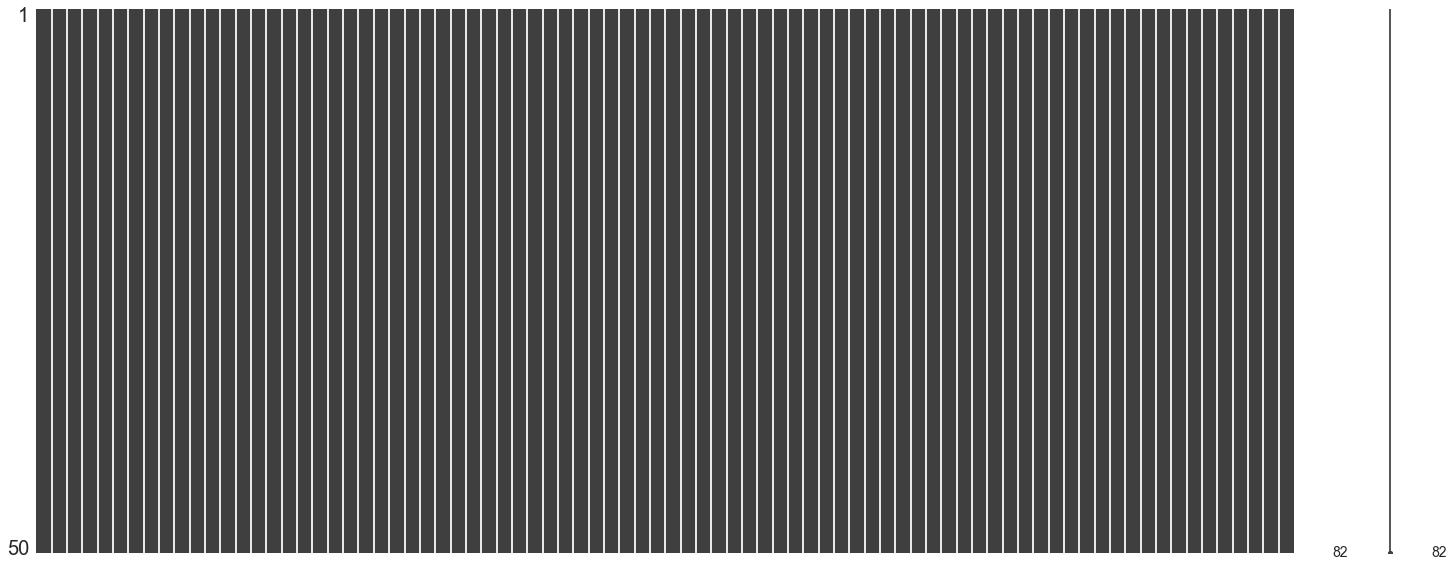

In [70]:
import missingno as msno
ax = msno.matrix(df.sample(50))

<AxesSubplot:>

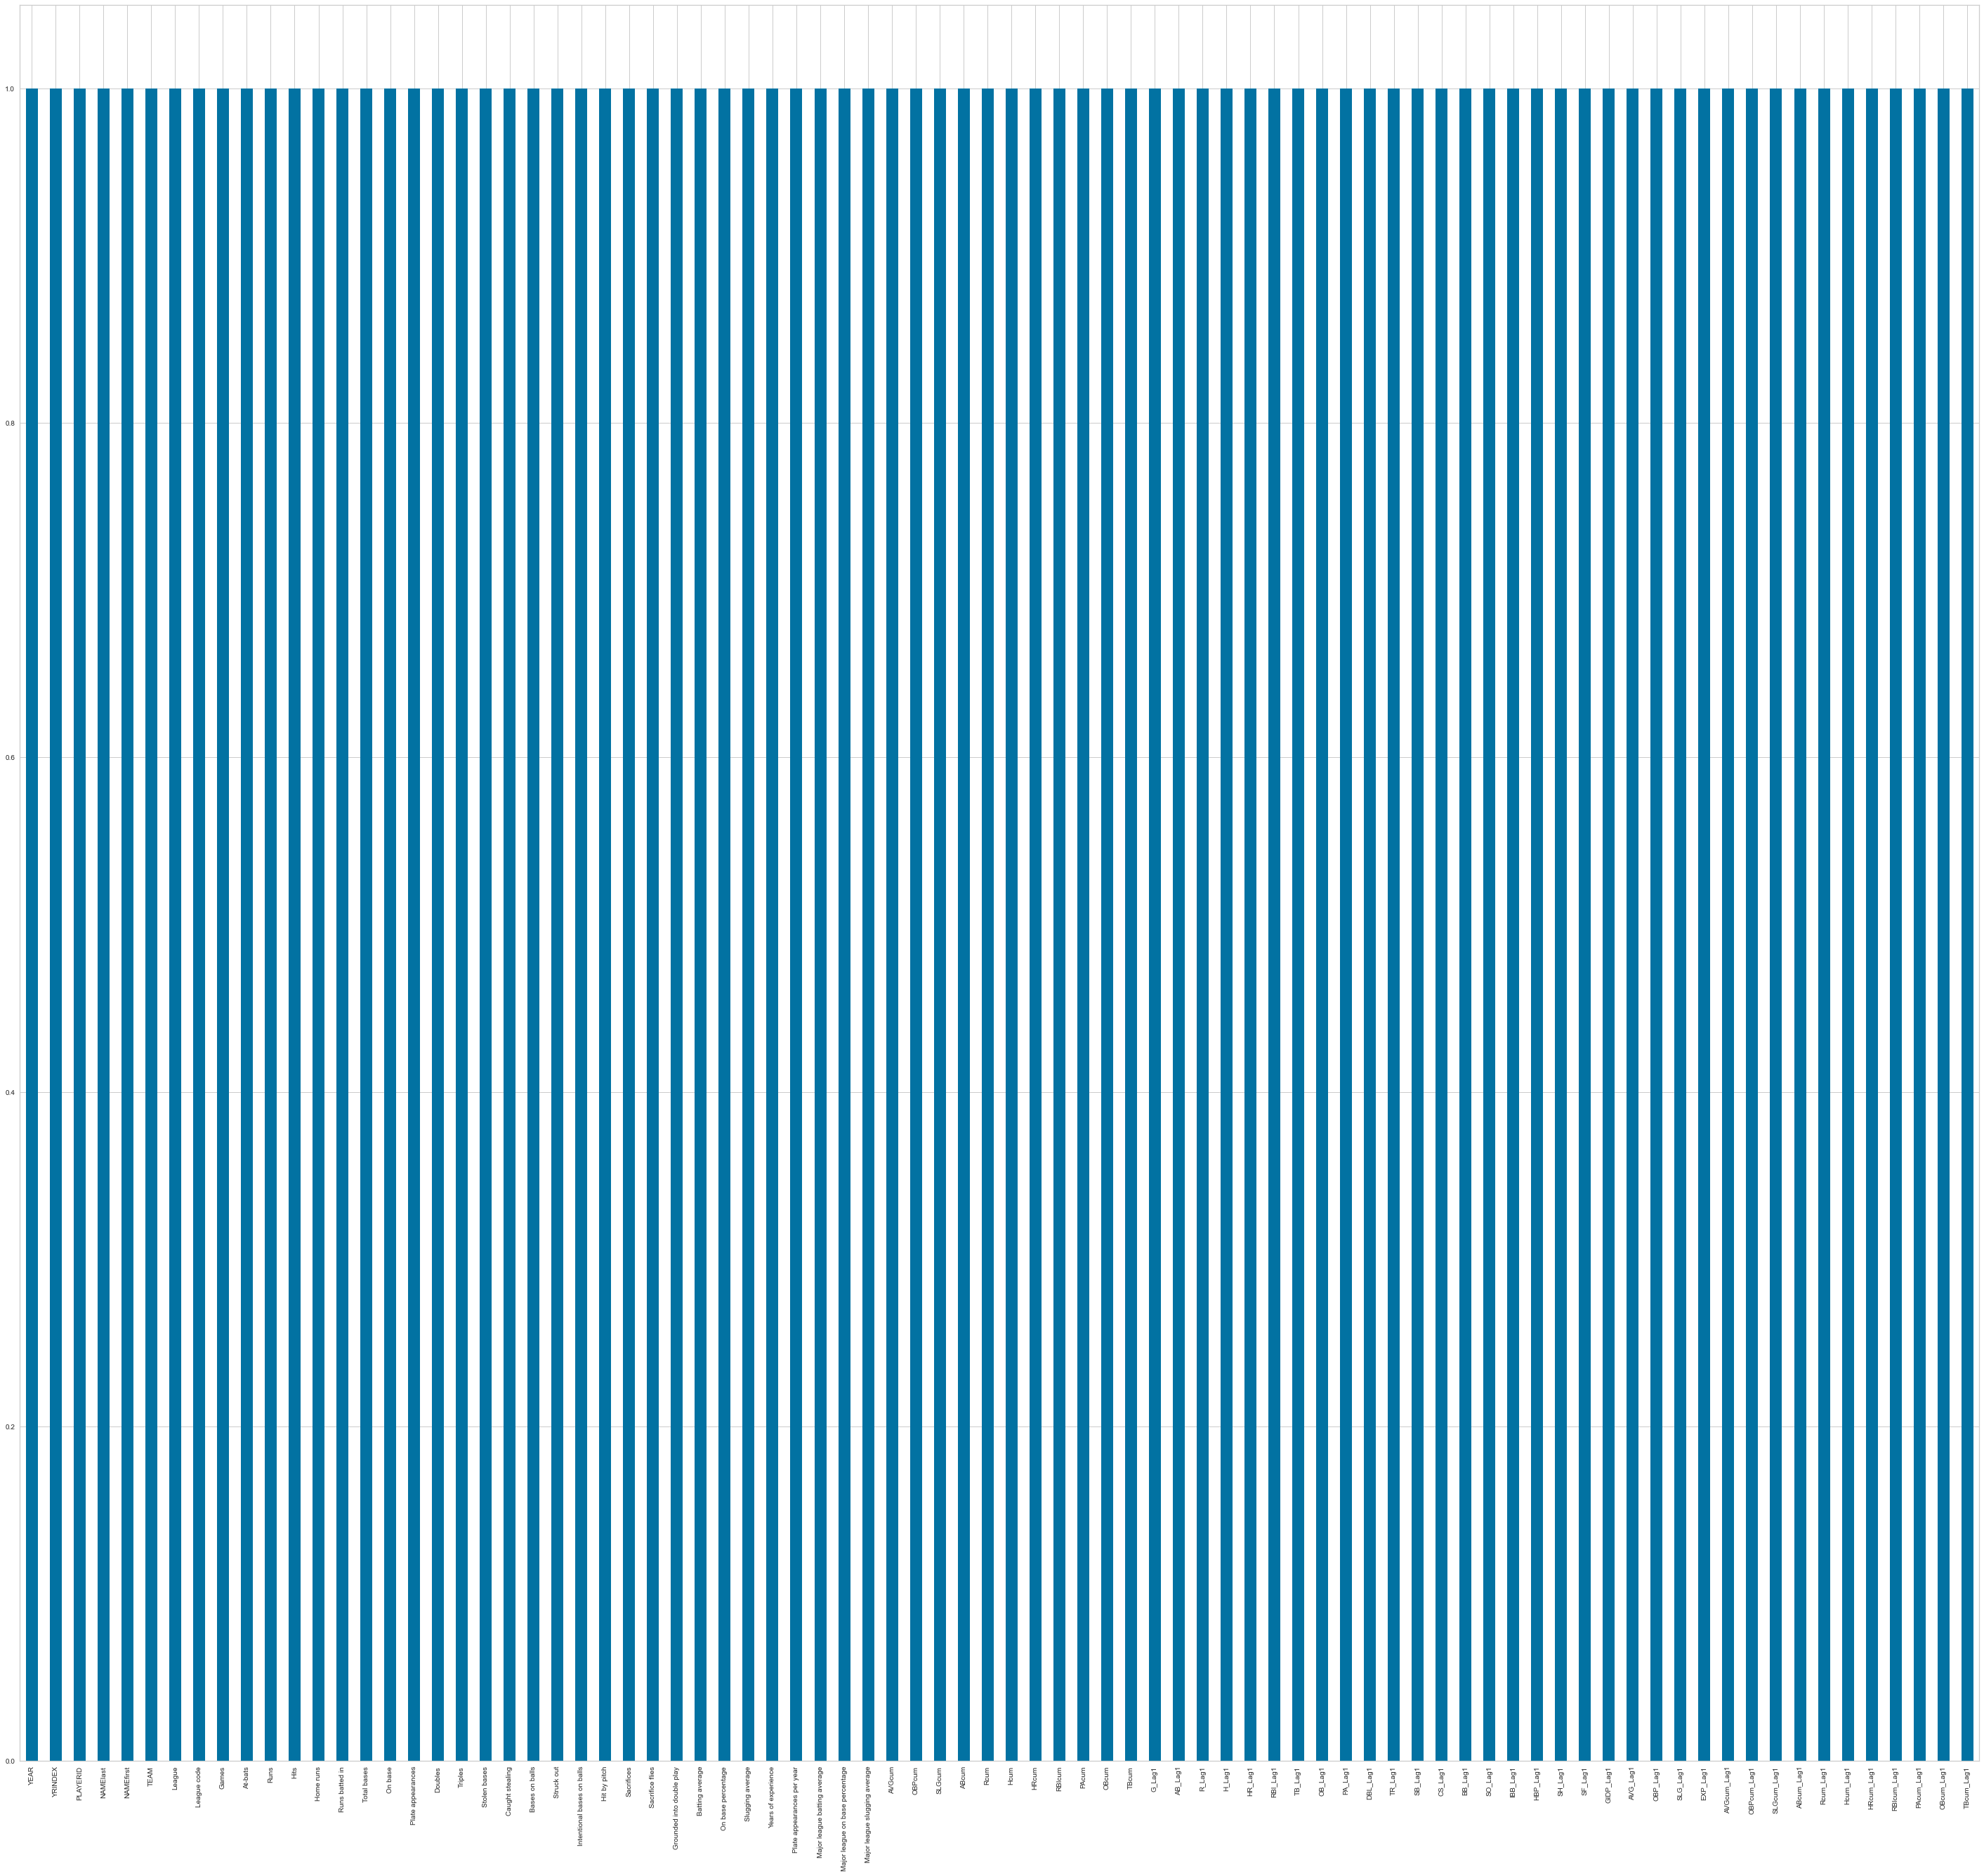

In [71]:
fig, ax = plt.subplots(figsize=(50, 46))
(1 - df.isnull().mean()).abs().plot.bar(ax=ax)

/Users/obeidnas/opt/anaconda3/lib/python3.8/site-packages/scipy/cluster/hierarchy.py:2872: UserWarning: Attempting to set identical left == right == 0.0 results in singular transformations; automatically expanding.
  ax.set_xlim([dvw, 0])


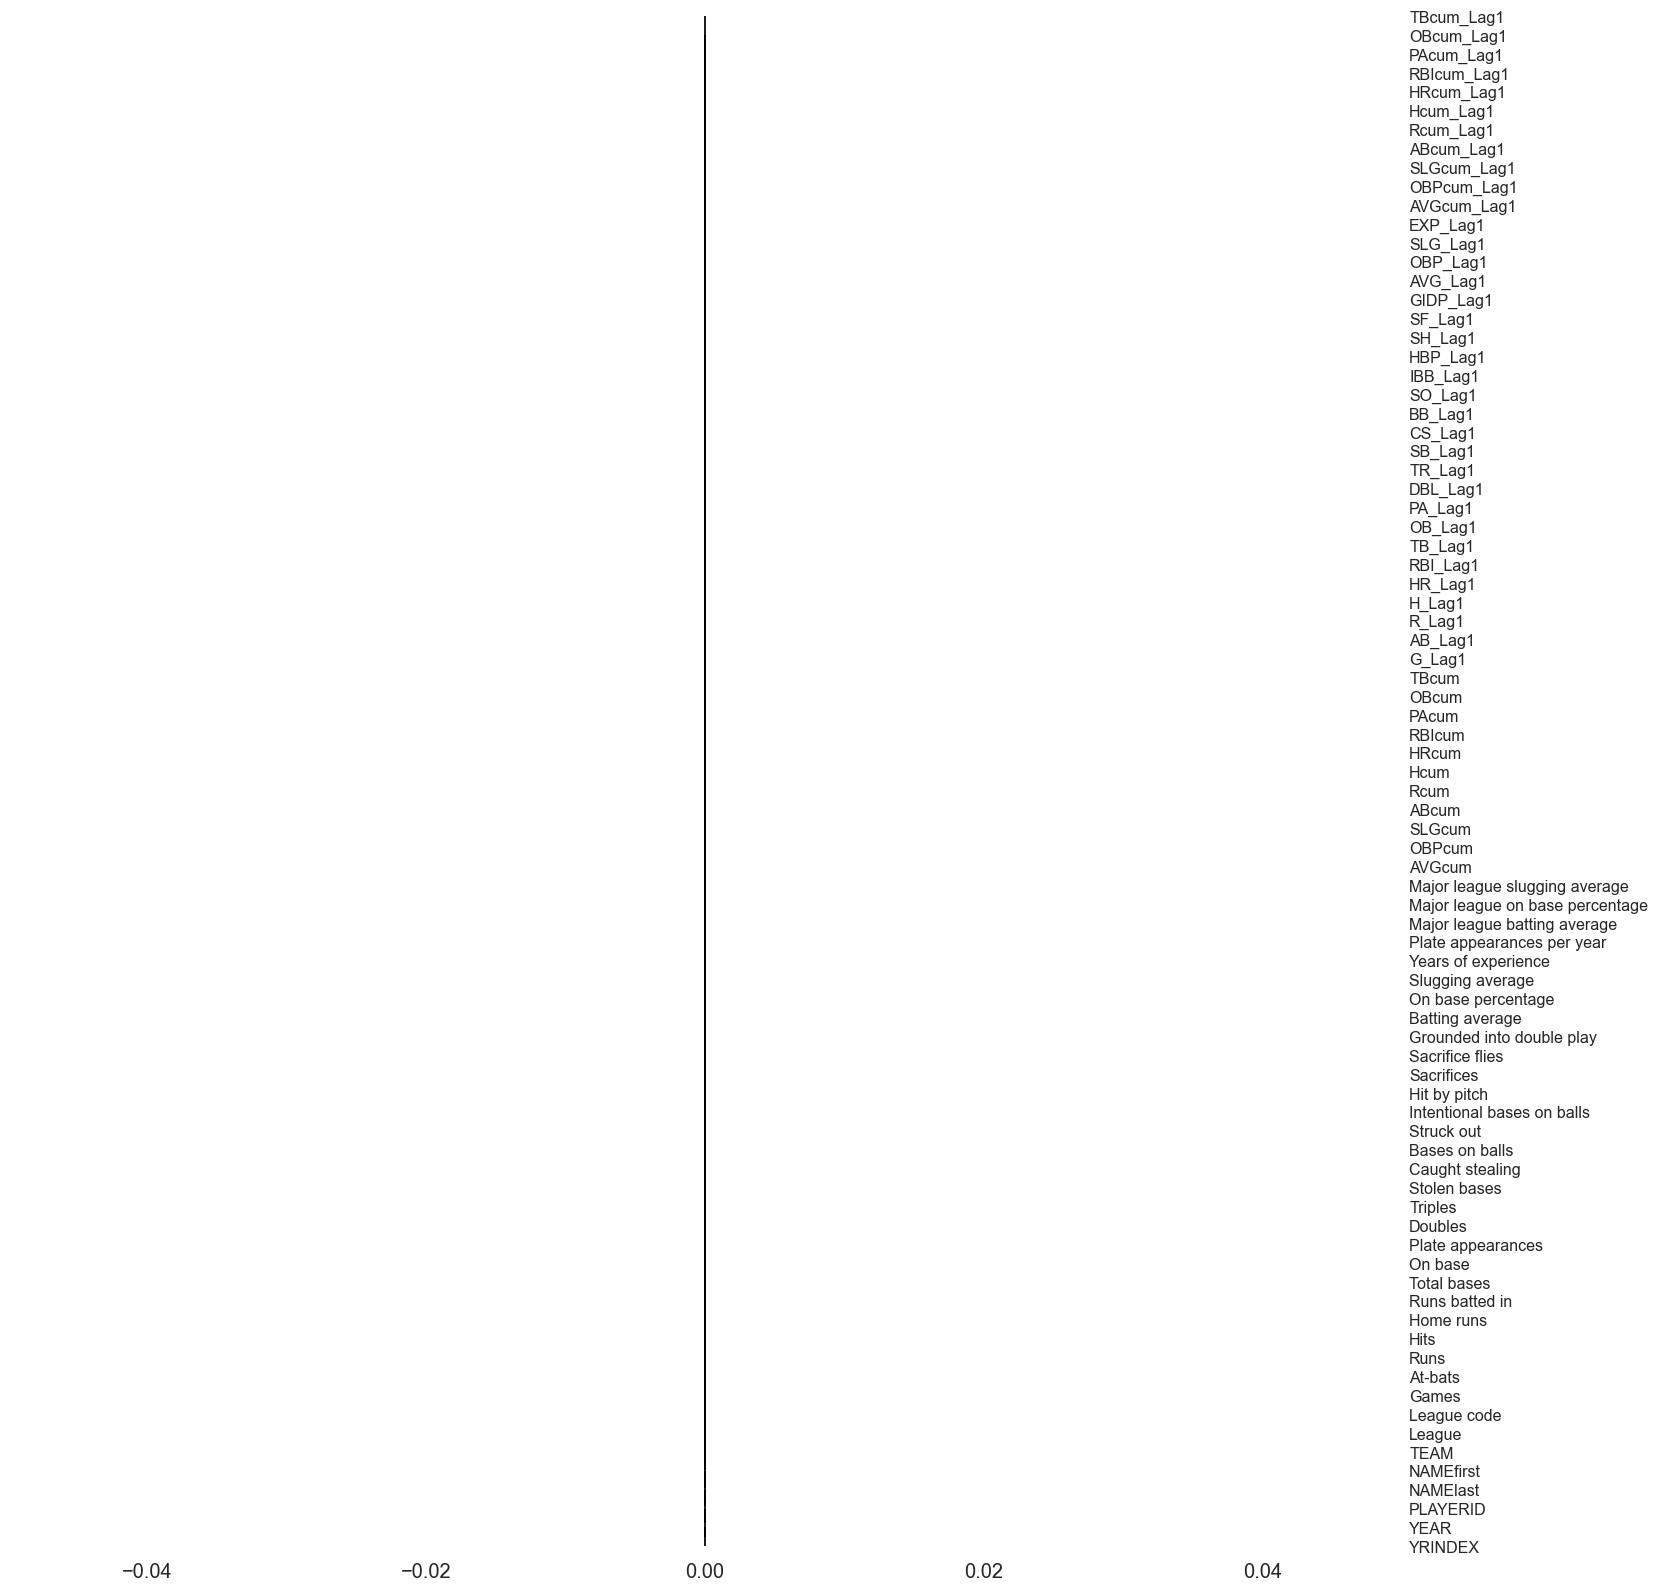

In [72]:
ax = msno.dendrogram(df)

In [96]:
df = df.replace({'League': {'AL->AL': 'AL','NL->AL':'AL','NL->NL->NL':'NL','NL->AL->NL':'NL','AL->NL':'NL','NL->AL-NL':'NL','NL->NL->AL':'AL', 'NL->AL':'AL','NL->NL':'NL','NL->NL->AL->AL':'AL','AL->NL->AL->AL':'AL','AL->NL->AL':'AL'}})

df['League'].iloc[:40]

0     NL
1     NL
2     NL
3     NL
4     NL
5     NL
6     NL
7     NL
8     NL
9     NL
10    NL
11    NL
12    NL
13    NL
14    NL
15    NL
16    NL
17    NL
18    NL
19    AL
20    AL
21    AL
22    NL
23    NL
24    AL
25    NL
26    NL
27    NL
28    AL
29    NL
30    NL
31    NL
32    NL
33    NL
34    NL
35    NL
36    AL
37    NL
38    NL
39    NL
Name: League, dtype: object

Text(0.5, 1.0, 'Hits by League , divided by Years of experience')

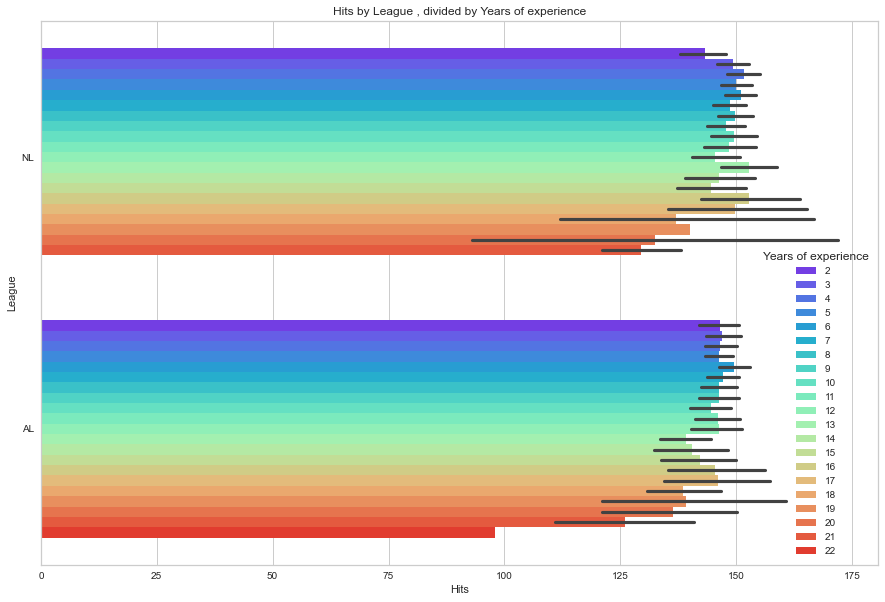

In [5]:
plt.figure(figsize=(15,10))
sns.barplot(x=df['Hits'],y=df['League'],data=df, palette='rainbow', hue='Years of experience')
plt.title("Hits by League , divided by Years of experience")

# Feature Selection

In [97]:
df = df.replace({'League': {'NL':1,'AL':0}})

In [98]:
X = df.drop(['Runs','PLAYERID','NAMElast','NAMEfirst','TEAM'], axis =1 )
y = df['Runs']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [48]:
#One hot encoding
df = pd.get_dummies(df, drop_first=True)
df.head()

YEAR  YRINDEX  League  League code  Games  At-bats  Runs  Hits  Home runs  \
0  1960        2       1            2    153      590   102   172         40   
1  1961        3       1            2    155      603   115   197         34   
2  1962        4       1            2    156      592   127   191         45   
3  1963        5       1            2    161      631   121   201         44   
4  1964        6       1            2    145      570   103   187         24   

   Runs batted in  ...  TEAM_TOR  TEAM_TOR->BAL  TEAM_TOR->LAN  TEAM_TOR->MIN  \
0             126  ...         0              0              0              0   
1             120  ...         0              0              0              0   
2             128  ...         0              0              0              0   
3             130  ...         0              0              0              0   
4              95  ...         0              0              0              0   

   TEAM_TOR->NYA  TEAM_TOR->OAK  TEAM_WS1  TEAM_WS2  TEAM_WS2->CAL  \
0              0              0         0         0              0   
1              0              0         0         0              0   
2              0              0         0         0              0   
3              0              0         0         0              0   
4              0              0         0         0              0   

   TEAM_WS2->OAK  
0              0  
1              0  
2              0  
3              0  
4              0  

[5 rows x 2455 columns]

<AxesSubplot:ylabel='feature'>

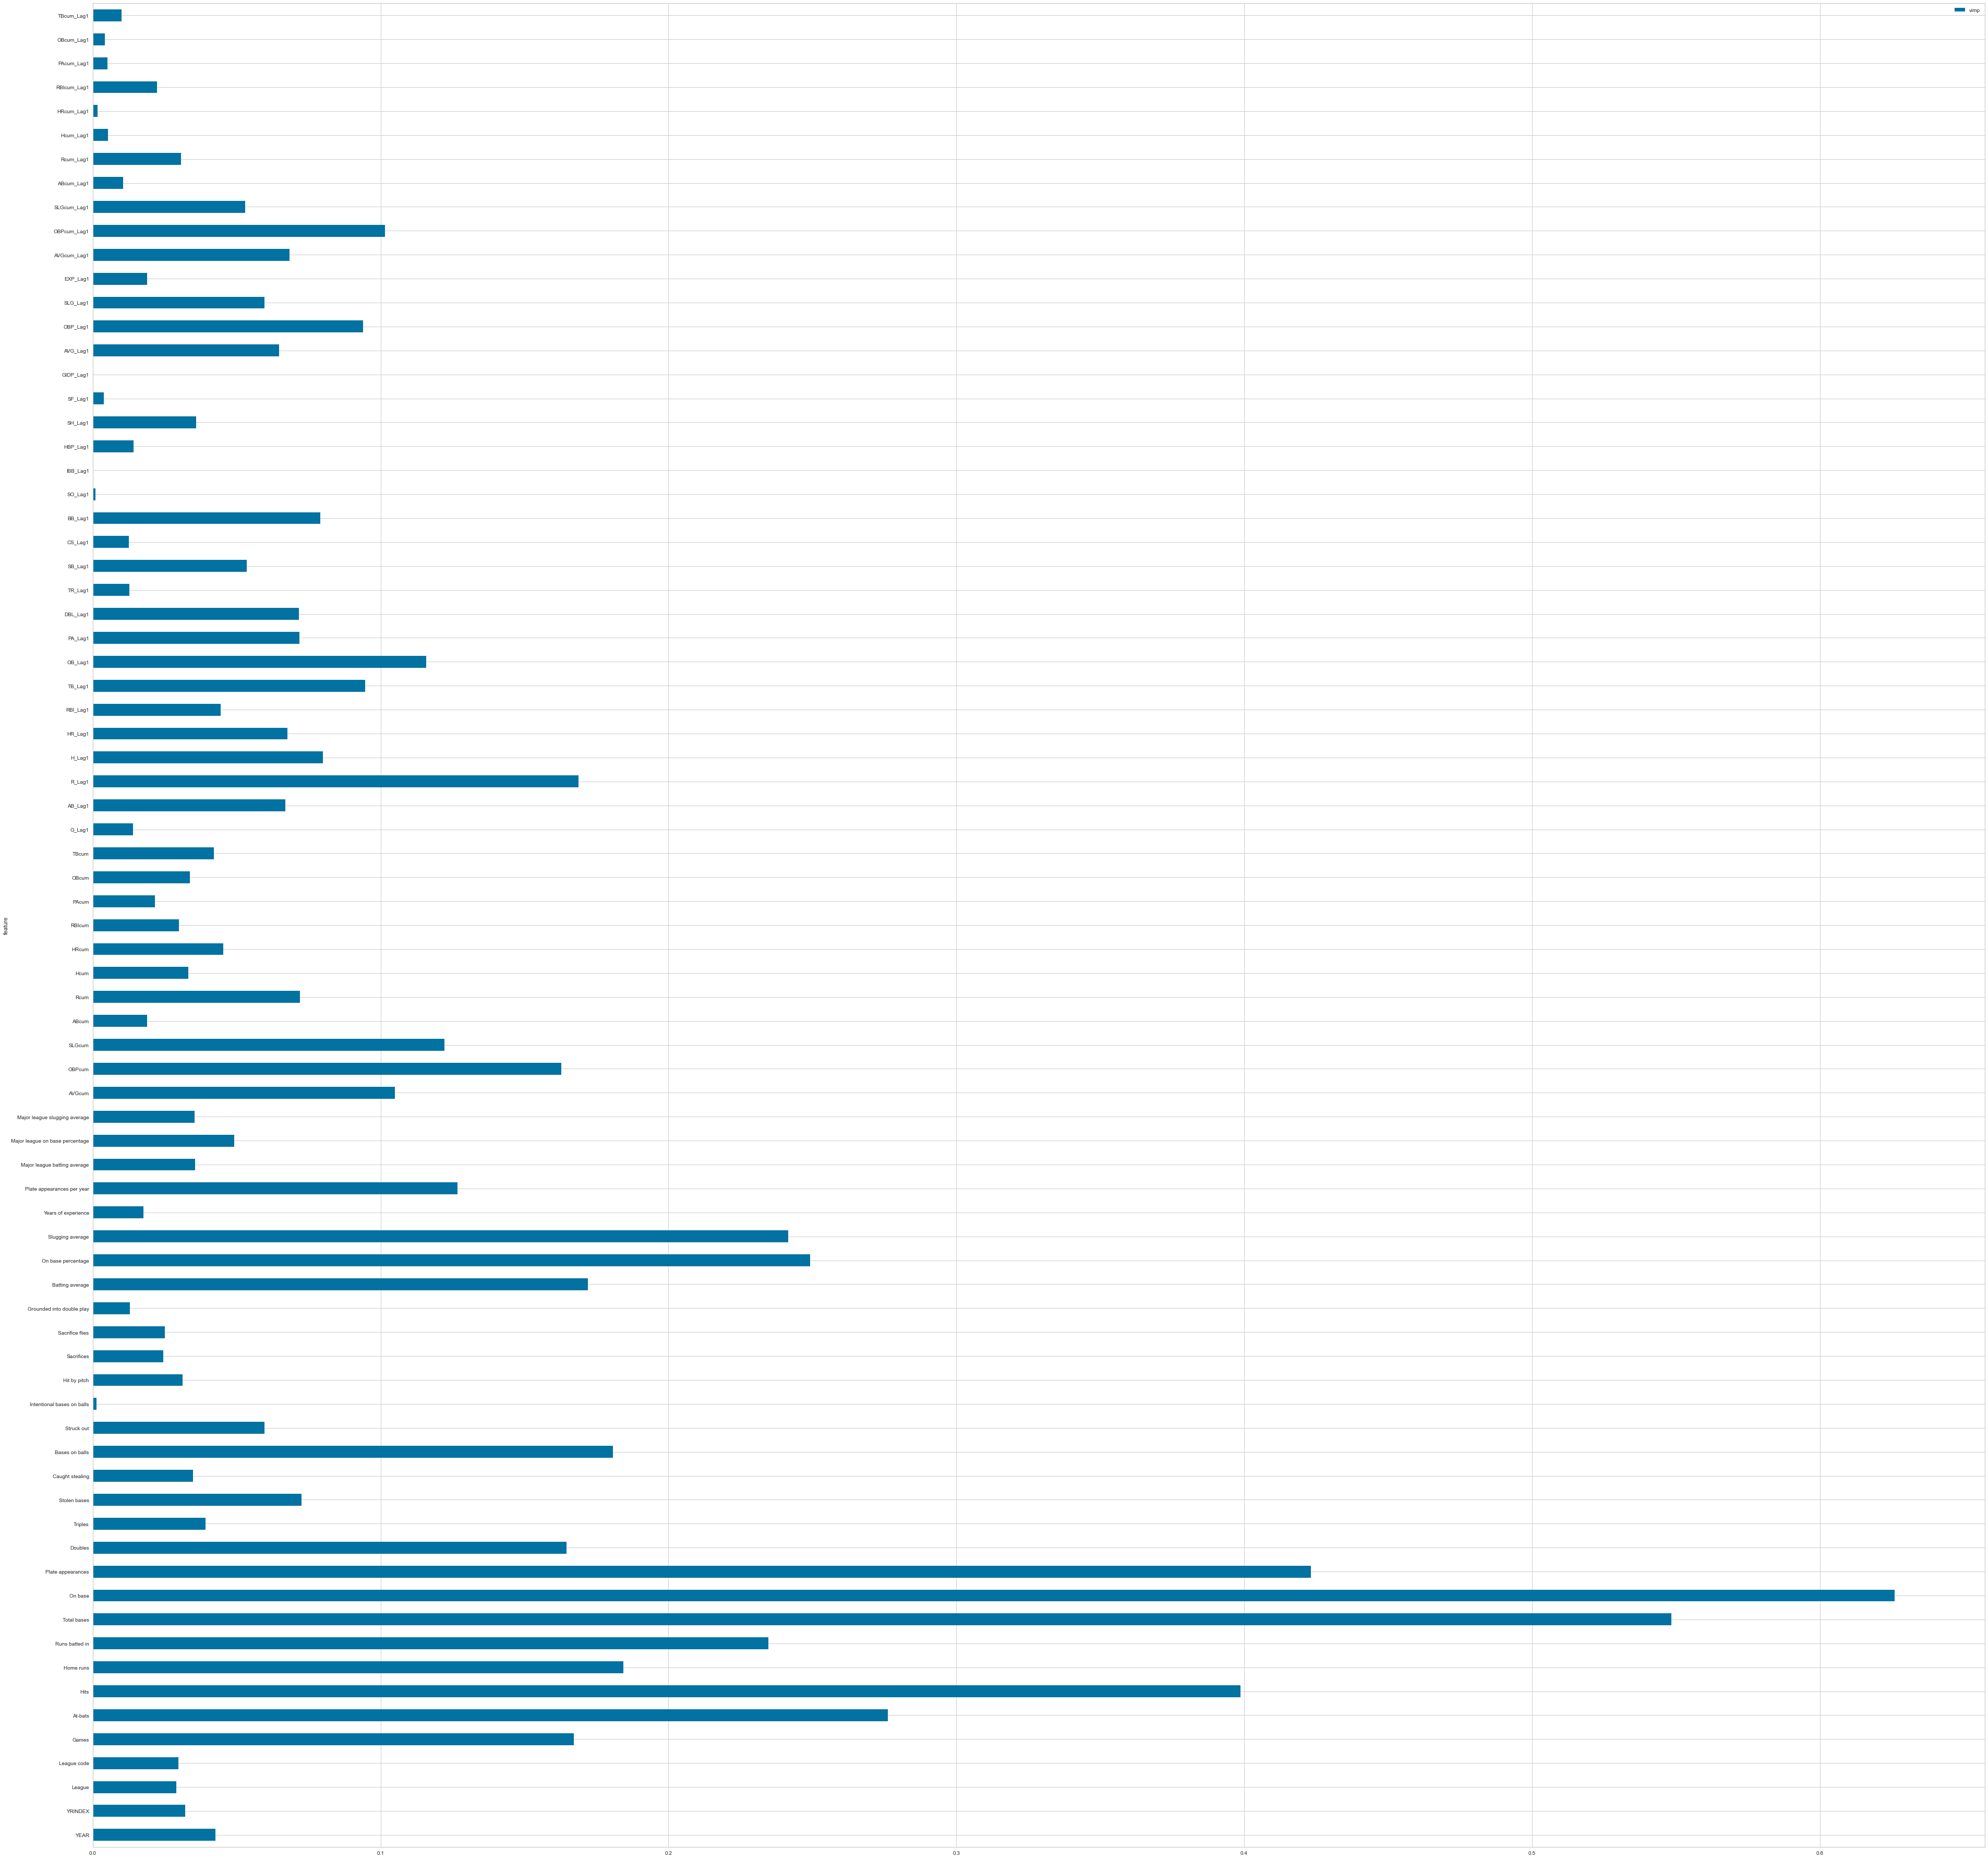

In [47]:
from sklearn import feature_selection

mic = feature_selection.mutual_info_classif(
    X, y
 )
fig, ax = plt.subplots(figsize=(65, 65))
(
    pd.DataFrame(
         {"feature": X.columns, "vimp": mic}
     )
     .set_index("feature")
     .plot.barh(ax=ax)
 )
 

In [100]:
#Top ten feautures at least 0.15 coefficient ratio
X = df[['At-bats','Hits','Runs batted in', 'Total bases','Plate appearances','On base percentage','Batting average','Home runs','Batting average','OBPcum','R_Lag1']]
y = df['Runs']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

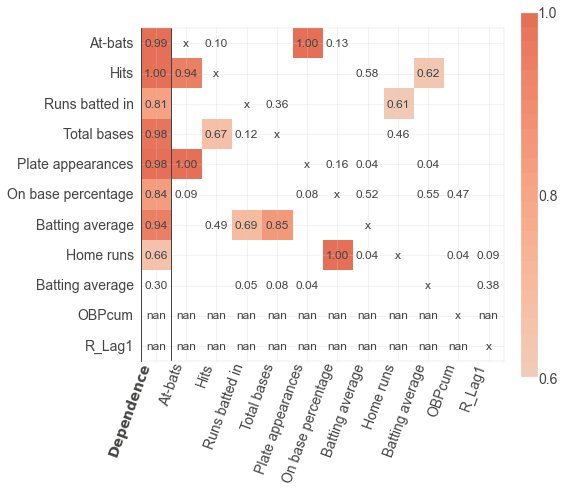

In [101]:
rfpimp.plot_dependence_heatmap(
     rfpimp.feature_dependence_matrix(X_train),
    value_fontsize=12,
    label_fontsize=14,
    figsize=(8, 8),
 )
fig = plt.gcf()



# Unsupervised Learning

## Heirchal clustering

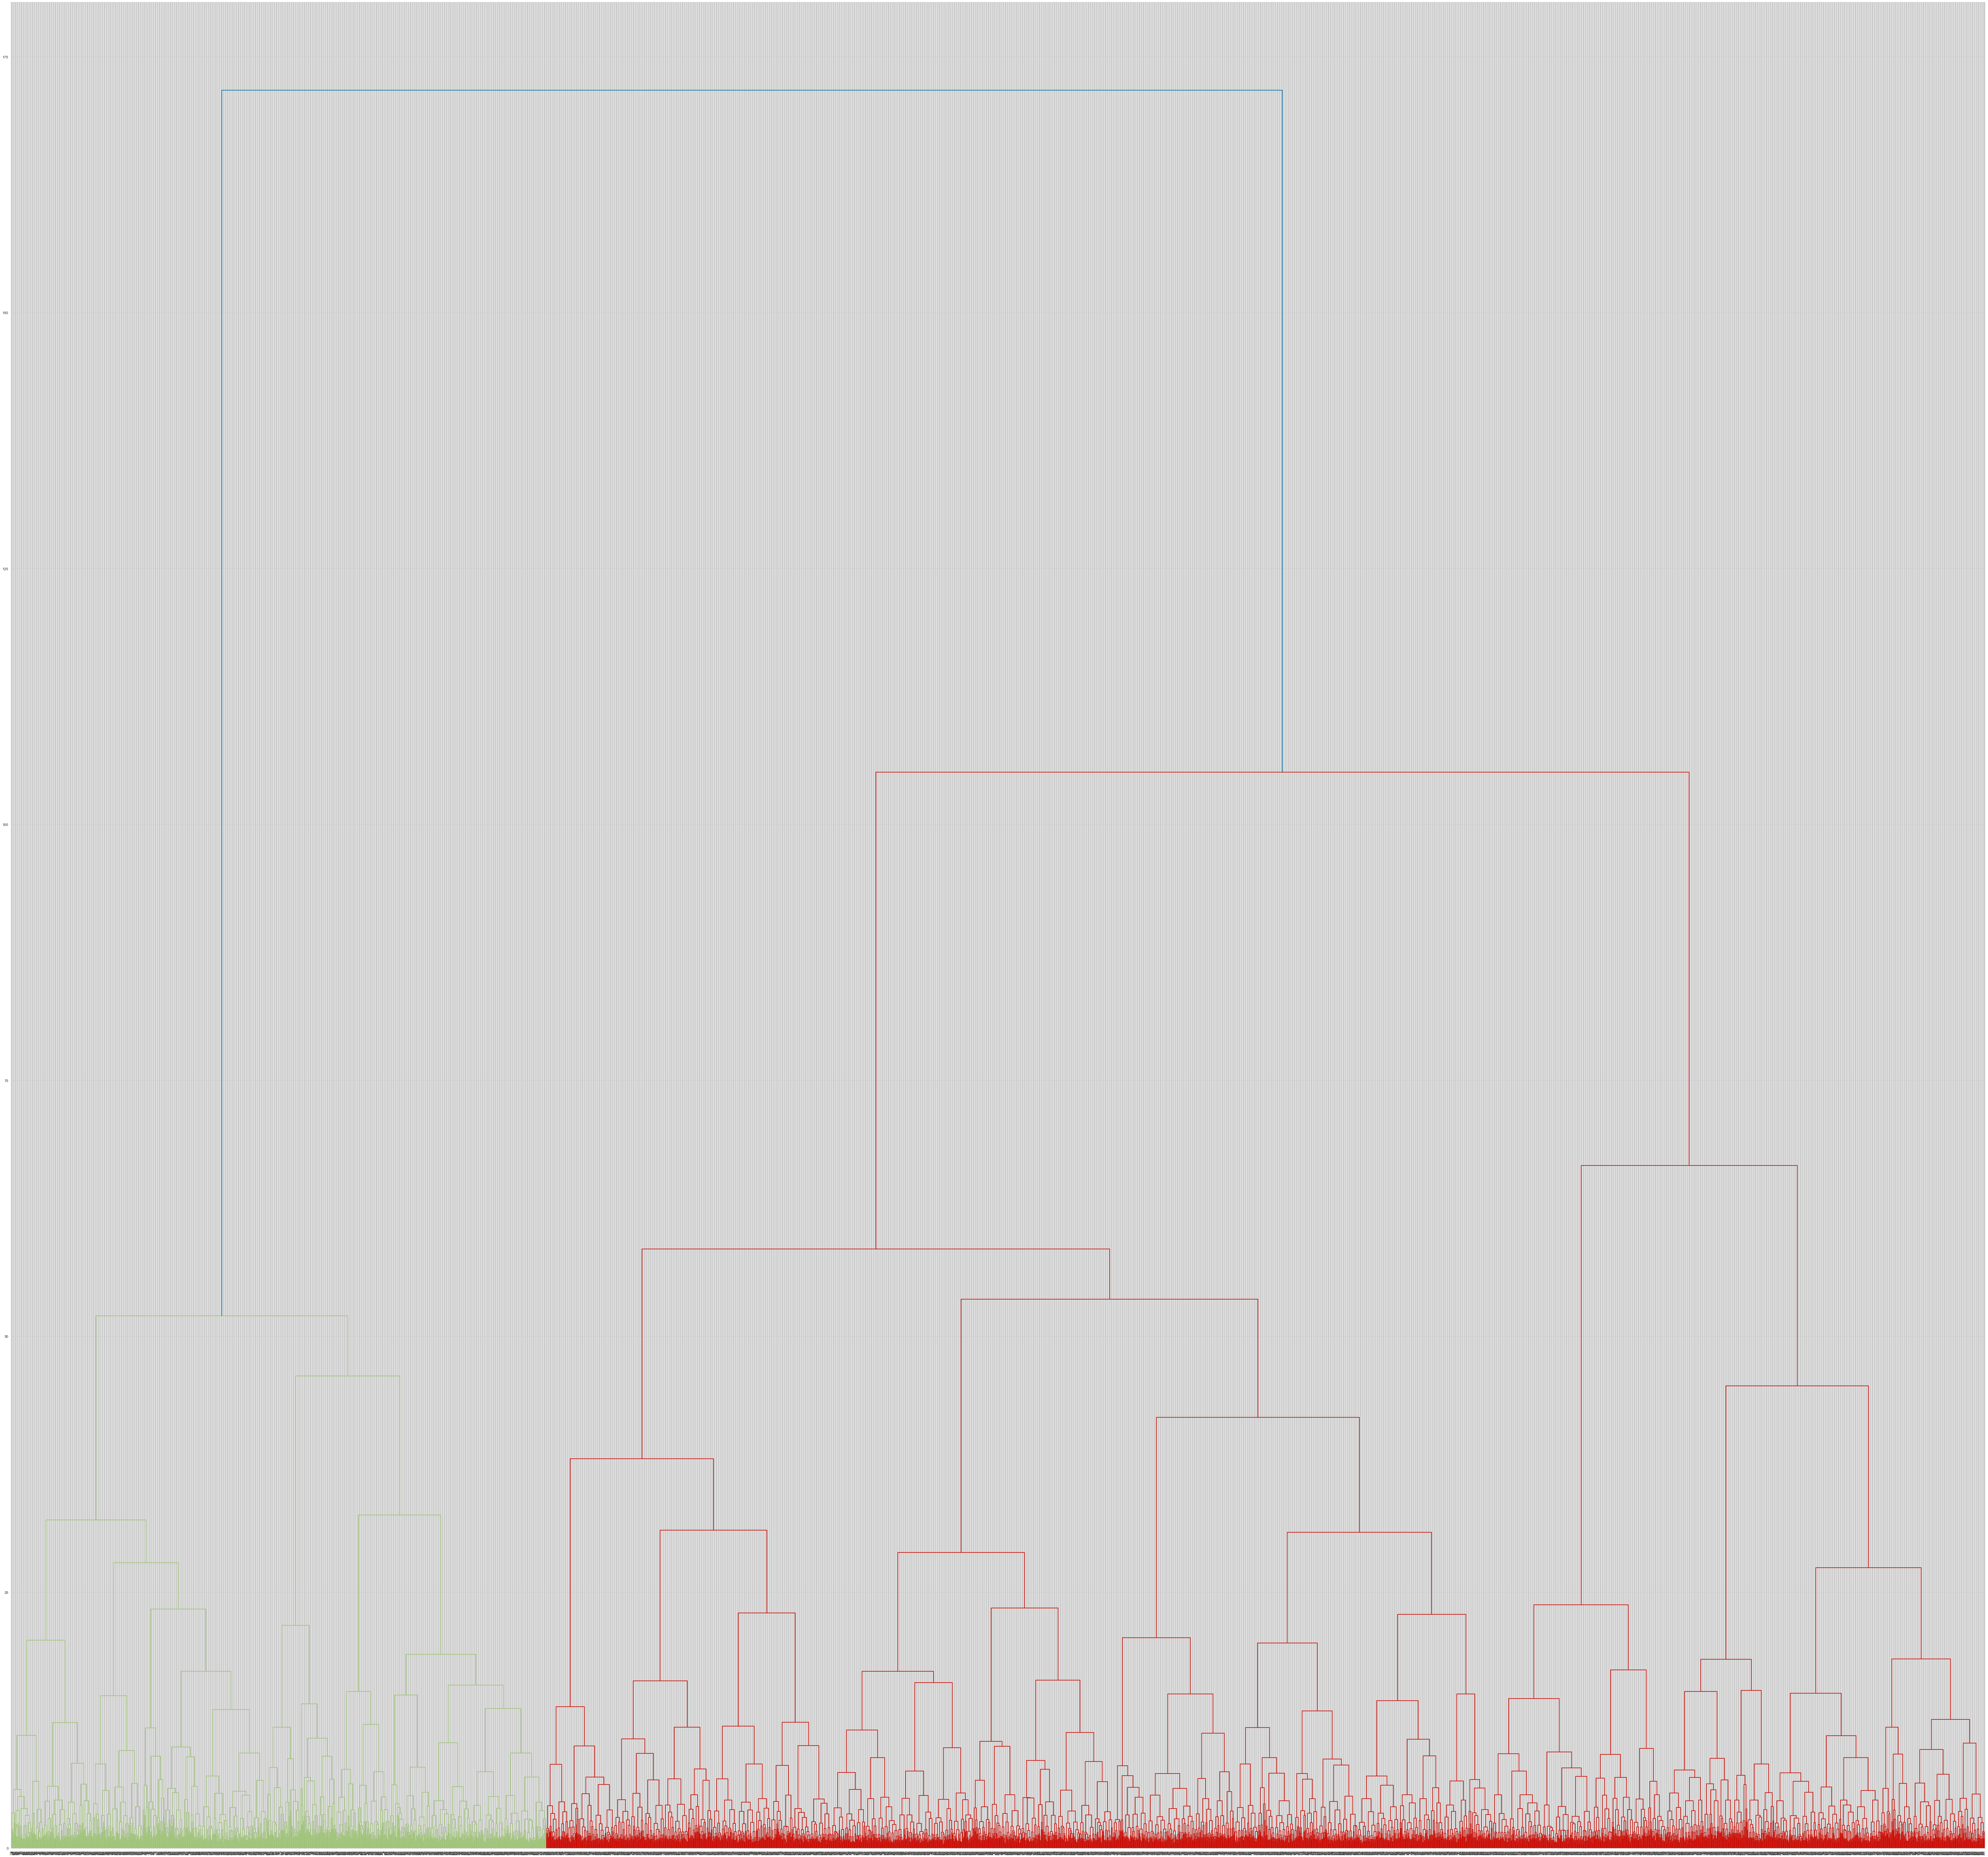

In [52]:
X_std = preprocessing.StandardScaler().fit_transform(X)

fig, ax = plt.subplots(figsize=(100, 96))
dend = hierarchy.dendrogram(
hierarchy.linkage(X_std, method="ward"))

## K-clustering

In [87]:
from sklearn import preprocessing
from sklearn.cluster import KMeans
X_std = preprocessing.StandardScaler().fit_transform(X )
km = KMeans(2, random_state=42)
km.fit(X_std)

KMeans(n_clusters=2, random_state=42)

/Users/obeidnas/opt/anaconda3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/__init__.py:71: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  plot_obj.generate()


array([[<AxesSubplot:xlabel='k'>, <AxesSubplot:xlabel='k'>],
       [<AxesSubplot:xlabel='k'>, <AxesSubplot:xlabel='k'>]], dtype=object)

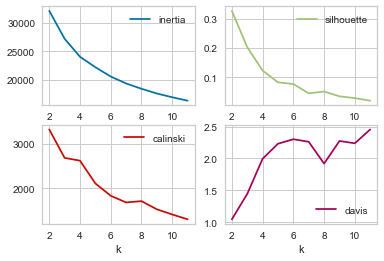

In [88]:
from sklearn import metrics
inertias = []
sils = []
chs = []
dbs = []
sizes = range(2, 12)
for k in sizes:
    k2 = KMeans(random_state=42, n_clusters=k)
    k2.fit(X_std)
    inertias.append(k2.inertia_)
    sils.append(
        metrics.silhouette_score(X, k2.labels_)    )
    chs.append(
    metrics.calinski_harabasz_score(X, k2.labels_
         )
     )
    dbs.append(
         metrics.davies_bouldin_score(
             X, k2.labels_
         )
     )
fig, ax = plt.subplots(figsize=(6, 4))
(
     pd.DataFrame(
         {
             "inertia": inertias,
             "silhouette": sils,
             "calinski": chs,
             "davis": dbs,
             "k": sizes,
         }
     )
     .set_index("k")
     .plot(ax=ax, subplots=True, layout=(2, 2))
)

Text(0, 0.5, 'Inertia')

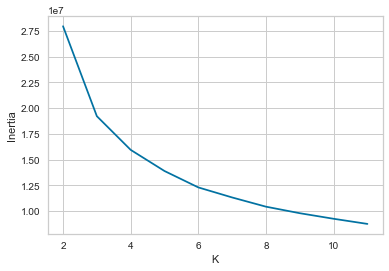

In [89]:
inertias = []
sizes = range(2, 12)
for k in sizes:
    k2 = KMeans(random_state=42, n_clusters=k)
    k2.fit(X)
    inertias.append(k2.inertia_)
fig, ax = plt.subplots(figsize=(6, 4))
pd.Series(inertias, index=sizes).plot(ax=ax)
ax.set_xlabel("K")
ax.set_ylabel("Inertia")

# Comparing Algorithms

## PCA with K-clustering 

In [90]:
pca = PCA(10)
X_pca = pca.fit_transform(StandardScaler().fit_transform(X))

/Users/obeidnas/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='PC1', ylabel='PC2'>

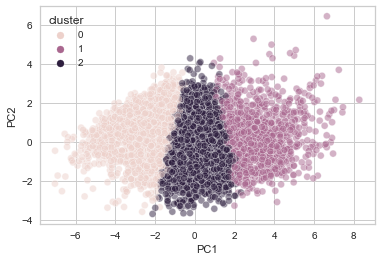

In [93]:
fig, ax = plt.subplots(figsize=(6, 4))
sns.scatterplot(
     "PC1",
    "PC2",
     data=X.assign(
         PC1=X_pca[:, 0],
         PC2=X_pca[:, 1],
         cluster=labels,
     ),
     hue="cluster",
     alpha=0.5,
     ax=ax,
 )

<AxesSubplot:>

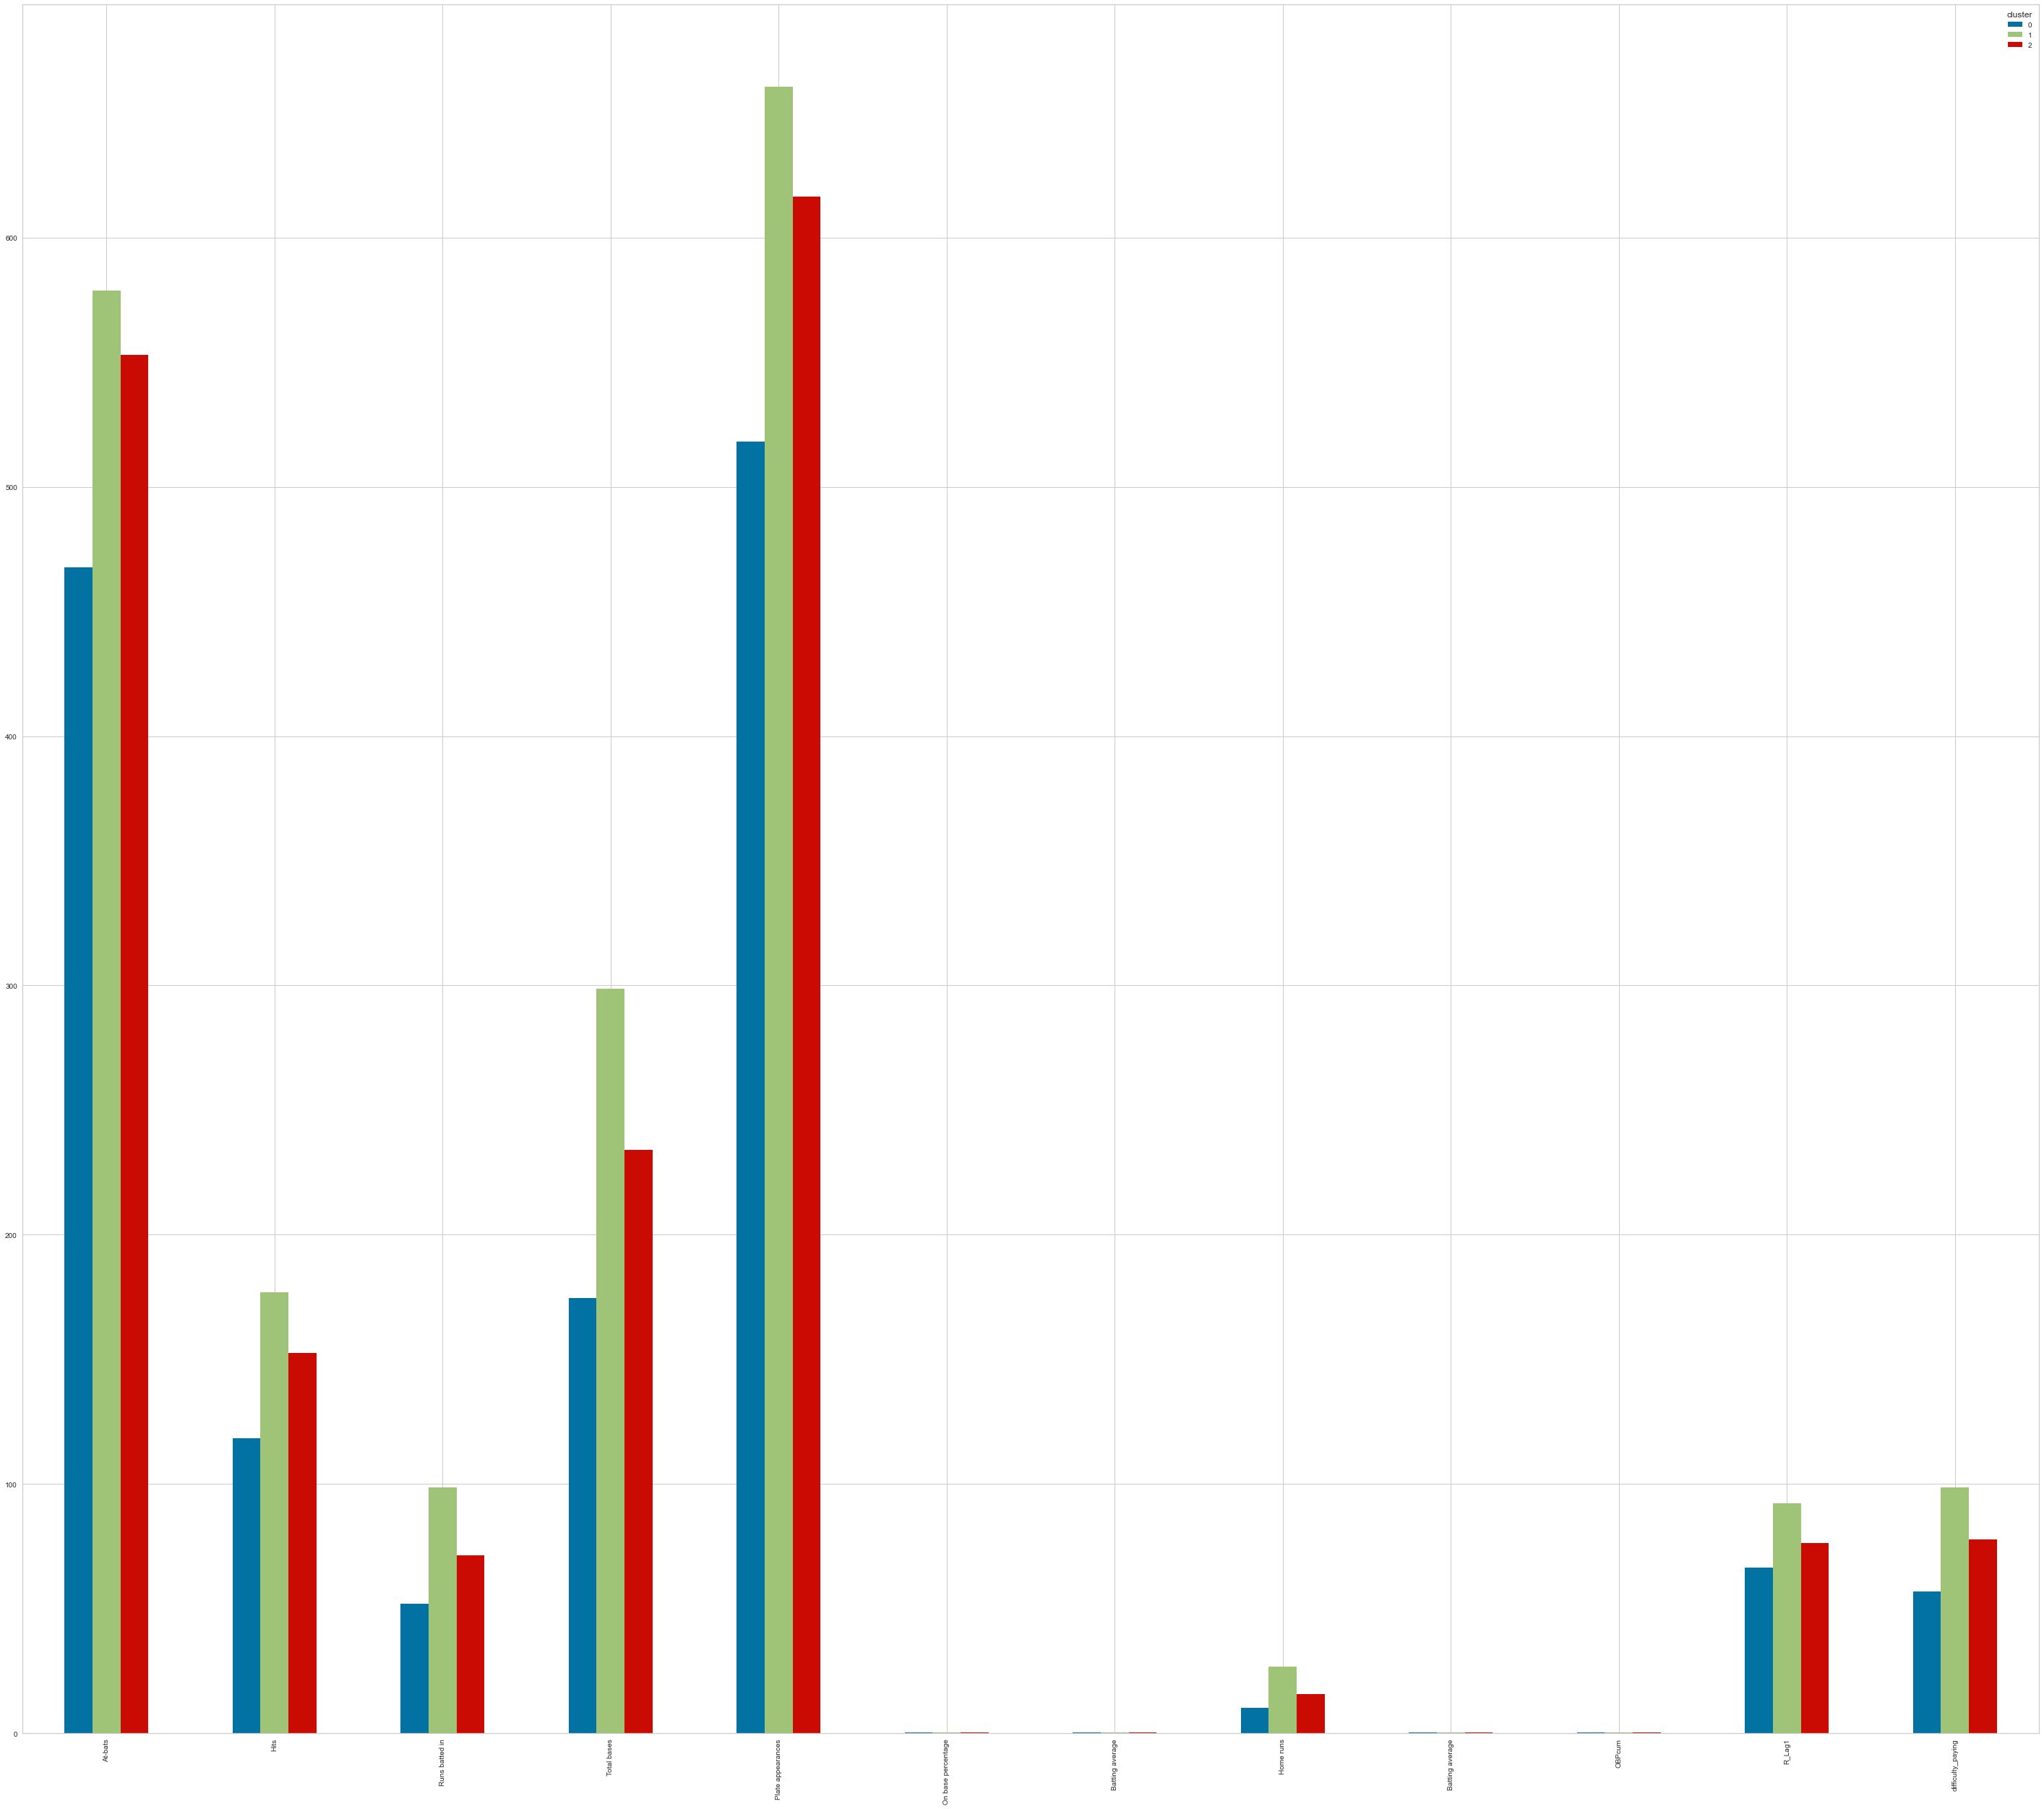

In [92]:
fig, ax = plt.subplots(figsize=(50, 44))
(
     X.assign(cluster=labels, difficulty_paying=y)
     .groupby("cluster")
     .mean()
    .T.plot.bar(ax=ax)
)

# Comparing Algorithms

# Random Forest

In [55]:
clf = RandomForestClassifier(n_estimators = 100) 
 
# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf.fit(X_train, y_train)
 
# performing predictions on the test dataset
y_pred = clf.predict(X_test)
 
# metrics are used to find accuracy or error
from sklearn import metrics 
print()
 
# using metrics module for accuracy calculation
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_pred))


ACCURACY OF THE MODEL:  0.03600293901542983


In [74]:
recall_score(y_train, y_train_pred, average = 'weighted')

0.03780718336483932

In [75]:
from sklearn.metrics import f1_score
f1_score(y_train, y_train_pred, average = 'weighted')

0.035893949572823144

In [76]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_train, y_train_pred, average = 'weighted')

/Users/obeidnas/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.03528765211340596

# Random Forest with Bayesian Model

In [82]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X_train, y_train)
GaussianNB(priors=None, var_smoothing=1e-09)
nb.score(X_test, y_test)




0.03232916972814107

In [83]:
clf = RandomForestClassifier(n_estimators = 100) 
 
# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf.fit(X_train, y_train)
 
# performing predictions on the test dataset
y_pred = clf.predict(X_test)

In [84]:
recall_score(y_train, y_train_pred, average = 'weighted')

0.03780718336483932

In [85]:
from sklearn.metrics import f1_score
f1_score(y_train, y_train_pred, average = 'weighted')

0.035893949572823144

In [86]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_train, y_train_pred, average = 'weighted')

/Users/obeidnas/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.03528765211340596

# Recommendation

Based on the algorithms show, I recommend using an unsupervised learning model with this data set. As you can see, with algorithms such as Random Forest, the results for recall_score, f1_score, and precision_score were below 0.04 which is not accurate at all. This means that unsupervised is advised for this algortihm as the data is a regression set and not a classification. Thus, baseball is a sport with lots of factors in play thus the factors used to predict a successful run (which is the chance that a player passes 4 bases successfully) doesn't indicate if a performance of a player. Because the results are not labeled suh as runs, an unsupervised learning would be best suitable for this data set. I chose 2 Ks because the tree from HC represents 2 clusters: one green and one red. Euclidean distance was used to measure the similarity of objects and cluster into clusters. So, what does this tell you about the data? After using PCA, HC, and K-means, the dataset's target variable is valid based on the findings. Since there are at least 2 groups in the data set, there is most likely 2 target  variable that would need to be addressed. 